<a href="https://colab.research.google.com/github/saikrishna1108/Introduction-to-Machine-Learning/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4 (100 Points)

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Problem 1 (50pts):

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

Identify the optimum number of K, principal components that achieve the highest classification accuracy.
Plot your classification accuracy, precision, and recall over a different number of Ks.
Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
Compare your results against the logistic regression that you have done in homework 3.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/cancer.csv")
removed_column = data.pop('diagnosis')
data.pop('Unnamed: 32')
Y = pd.DataFrame({'diagnosis': removed_column})
X = data

In [ ]:

sc = StandardScaler()
X_std = sc.fit_transform(X)
Y = Y.values.ravel()
n = X.shape[1]
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []

for i in range(n):
    print("K = " + str(i + 1))
    pca = PCA(n_components=i + 1)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
    classifier = SVC(kernel='linear', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
    rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
    fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)

    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(i + 1)

high_acc = max(acc_list)
high_acc_k = acc_list.index(max(acc_list)) + 1
print("----------------")
print("Highest Classification Accuracy Achieved using linear kernel: " + str(high_acc) + " for K number = " + str(high_acc_k))


K = 1
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1-Score: 0.8842105263157894
K = 2
Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 0.9361702127659575
F1-Score: 0.9072164948453608
K = 3
Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 0.9361702127659575
F1-Score: 0.9072164948453608
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1-Score: 0.9361702127659575
K = 5
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 6
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 7
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 8
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 9
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.936

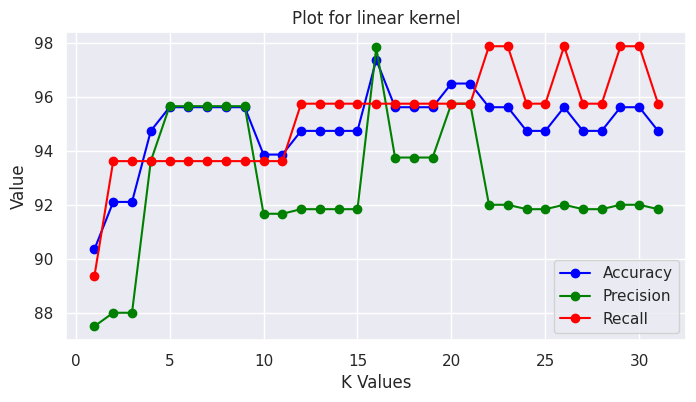

In [ ]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in blue
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='blue', label='Accuracy')

# Plot Precision in green
plt.plot(k_list, precision_list, marker='o', linestyle='-', color='green', label='Precision')

# Plot Recall in red
plt.plot(k_list, recall_list, marker='o', linestyle='-', color='red', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Using Polynomial kernel

In [ ]:
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []
for i in range(n):
    print("K = " + str(i + 1))
    pca = PCA(n_components=i + 1)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
    classifier = SVC(kernel='poly', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
    rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
    fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)

    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(i + 1)

high_acc = max(acc_list)
high_acc_k = acc_list.index(max(acc_list)) + 1
print("----------------")
print("Highest Classification Accuracy Achieved using polynomial kernel: " + str(high_acc) + " for K number = " + str(high_acc_k))

K = 1
Accuracy: 0.8596491228070176
Precision: 1.0
Recall: 0.6595744680851063
F1-Score: 0.7948717948717948
K = 2
Accuracy: 0.9298245614035088
Precision: 0.975609756097561
Recall: 0.851063829787234
F1-Score: 0.9090909090909092
K = 3
Accuracy: 0.9298245614035088
Precision: 1.0
Recall: 0.8297872340425532
F1-Score: 0.9069767441860465
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9555555555555556
Recall: 0.9148936170212766
F1-Score: 0.9347826086956522
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1-Score: 0.9565217391304347
K = 6
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 7
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 8
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 9
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9574468085106383
F1-Score: 0.9782608695652174
K = 10

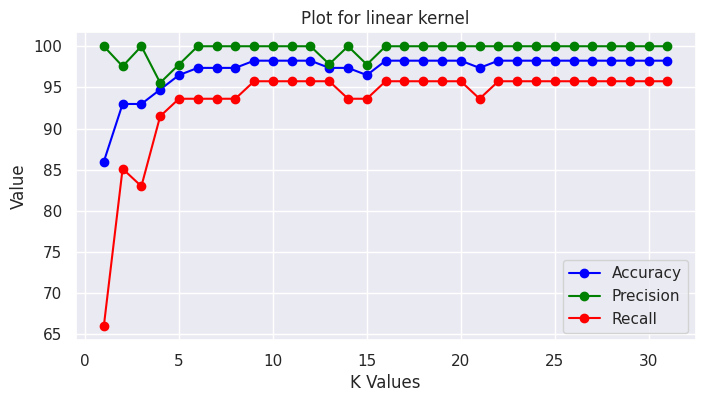

In [ ]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in blue
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='blue', label='Accuracy')

# Plot Precision in green
plt.plot(k_list, precision_list, marker='o', linestyle='-', color='green', label='Precision')

# Plot Recall in red
plt.plot(k_list, recall_list, marker='o', linestyle='-', color='red', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []
for i in range(n):
    print("K = " + str(i + 1))
    pca = PCA(n_components=i + 1)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
    classifier = SVC(kernel='rbf', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
    rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
    fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)

    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(i + 1)

high_acc = max(acc_list)
high_acc_k = acc_list.index(max(acc_list)) + 1
print("----------------")
print("Highest Classification Accuracy Achieved using RBF kernel: " + str(high_acc) + " for K number = " + str(high_acc_k))

K = 1
Accuracy: 0.8947368421052632
Precision: 0.8571428571428571
Recall: 0.8936170212765957
F1-Score: 0.875
K = 2
Accuracy: 0.9035087719298246
Precision: 0.86
Recall: 0.9148936170212766
F1-Score: 0.8865979381443299
K = 3
Accuracy: 0.9298245614035088
Precision: 0.9148936170212766
Recall: 0.9148936170212766
F1-Score: 0.9148936170212766
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1-Score: 0.9361702127659575
K = 5
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 6
Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1-Score: 0.9565217391304347
K = 7
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 8
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9574468085106383
F1-Score: 0.9782608695652174
K = 9
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9787234042553191
F1-Score: 0.98

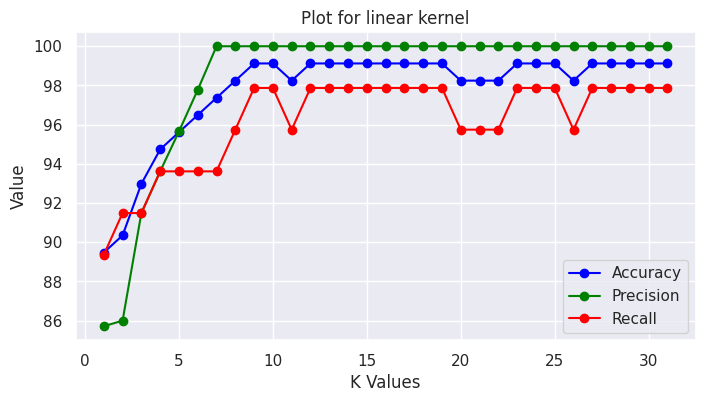

In [ ]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in blue
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='blue', label='Accuracy')

# Plot Precision in green
plt.plot(k_list, precision_list, marker='o', linestyle='-', color='green', label='Precision')

# Plot Recall in red
plt.plot(k_list, recall_list, marker='o', linestyle='-', color='red', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Problem 2 (50pts):

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Plot your regression model for SVR similar to the sample code provided on Canvas.
Compare your results against linear regression with regularization loss that you already did in homework1.
Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.
Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [ ]:
H_data = pd.read_csv("/content/drive/MyDrive/Housing.csv")


In [ ]:
def preprocess(data,variables):
  new_data = data[variables].replace({'yes':1,'no':0})
  x = new_data.iloc[:,1:]
  m = x.shape[0]
  y = np.array(new_data.iloc[:,0],dtype=np.float128).reshape(m,1)
  x = np.array(x,dtype=np.float128)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))
  return x,y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
variable = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X,Y = preprocess(H_data,variable)
sc = MinMaxScaler()
X_std = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
n=X.shape[1]
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
for k in range(1,n):
    pca = PCA(n_components=k)
    com = pca.fit_transform(X_train)
    com_test = pca.fit_transform(X_test)
    svr_lin = SVR(kernel='linear', C=10,cache_size=10000)
    y_fit = svr_lin.fit(com, y_train.ravel())
    y_pred = y_fit.predict(com_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_test, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("")
print("Linear kernel")
print("Best K value is :",best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')

K=1: RMSE = 1938707.16, R2 = 0.26
K=2: RMSE = 1937515.31, R2 = 0.26
K=3: RMSE = 1937534.56, R2 = 0.26
K=4: RMSE = 1937492.08, R2 = 0.26
K=5: RMSE = 1937604.52, R2 = 0.26
K=6: RMSE = 1937613.81, R2 = 0.26
K=7: RMSE = 1937635.46, R2 = 0.26
K=8: RMSE = 1937610.49, R2 = 0.26
K=9: RMSE = 1937610.95, R2 = 0.26
K=10: RMSE = 1937613.16, R2 = 0.26
K=11: RMSE = 1937620.67, R2 = 0.26

Linear kernel
Best K value is : 4
Best RMSE (K=4): 1937492.08
Corresponding Best R2: 0.26


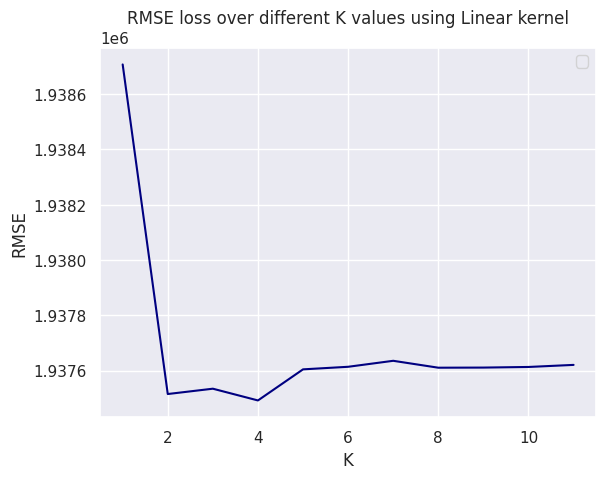

In [ ]:
plt.plot(range(1,n), rmse_list, color='navy')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using Linear kernel')
plt.legend()
plt.show()

K=1: RMSE = 2349294.96, R2 = -0.09
K=2: RMSE = 2349294.97, R2 = -0.09
K=3: RMSE = 2349294.98, R2 = -0.09
K=4: RMSE = 2349294.98, R2 = -0.09
K=5: RMSE = 2349294.99, R2 = -0.09
K=6: RMSE = 2349294.99, R2 = -0.09
K=7: RMSE = 2349294.99, R2 = -0.09
K=8: RMSE = 2349294.99, R2 = -0.09
K=9: RMSE = 2349294.99, R2 = -0.09
K=10: RMSE = 2349294.99, R2 = -0.09
K=11: RMSE = 2349294.99, R2 = -0.09

Polynomial kernel
Best K value is : 1
Best RMSE (K=1): 2349294.96
Corresponding Best R2: -0.09


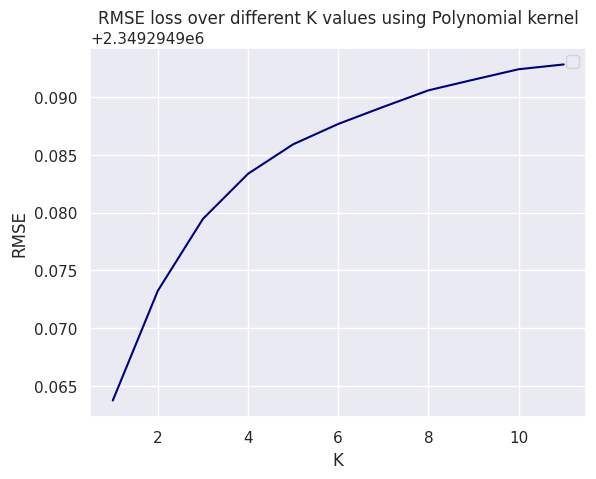

In [ ]:
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
for k in range(1,n):
    pca = PCA(n_components=k)
    com = pca.fit_transform(X_train)
    com_test = pca.fit_transform(X_test)
    svr_lin = SVR(kernel='poly', C=10,cache_size=10000)
    y_fit = svr_lin.fit(com, y_train.ravel())
    y_pred = y_fit.predict(com_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_test, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("")
print("Polynomial kernel")
print("Best K value is :",best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')
plt.plot(range(1,n), rmse_list, color='navy')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using Polynomial kernel')
plt.legend()
plt.show()

K=1: RMSE = 2359306.94, R2 = -0.10
K=2: RMSE = 2359306.94, R2 = -0.10
K=3: RMSE = 2359306.94, R2 = -0.10
K=4: RMSE = 2359306.94, R2 = -0.10
K=5: RMSE = 2359306.94, R2 = -0.10
K=6: RMSE = 2359306.94, R2 = -0.10
K=7: RMSE = 2359306.94, R2 = -0.10


K=8: RMSE = 2359306.94, R2 = -0.10
K=9: RMSE = 2359306.94, R2 = -0.10
K=10: RMSE = 2359306.94, R2 = -0.10
K=11: RMSE = 2359306.94, R2 = -0.10

RBF kernel
Best K value is : 1
Best RMSE (K=1): 2359306.94
Corresponding Best R2: -0.10


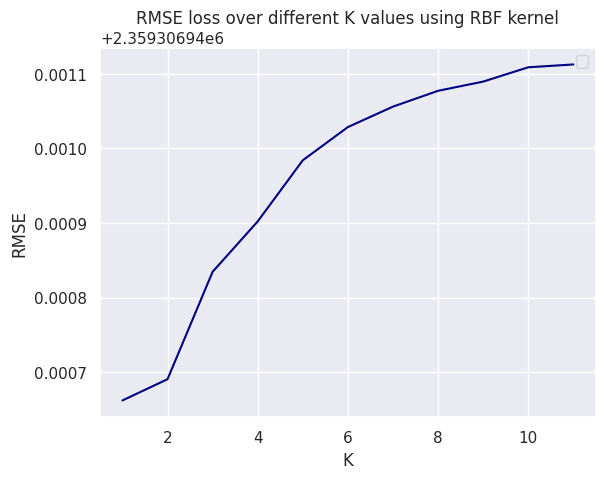

In [ ]:
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
for k in range(1,n):
    pca = PCA(n_components=k)
    com = pca.fit_transform(X_train)
    com_test = pca.fit_transform(X_test)
    svr_lin = SVR(kernel='rbf', C=10,cache_size=10000)
    y_fit = svr_lin.fit(com, y_train.ravel())
    y_pred = y_fit.predict(com_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_test, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("")
print("RBF kernel")
print("Best K value is :",best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')
plt.plot(range(1,n), rmse_list, color='navy')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using RBF kernel')
plt.legend()
plt.show()